# VHRdb

Exploration of the Viral Host Range database from Pasteur Institute [VRHdb](https://hub.pages.pasteur.fr/viralhostrangedb/)

Only interactions are pressented, unfortunately most of the sources (such as the Félix d'Hérelle collection) do not provide the sequences, only interactions. The phages and hosts with available public sequences have the NCBI identifier given and can be retrieved. 

TODO: Before retrieving anything, check if the sequence / ID is already present with the phagescope metadata. 


**WARNING:** The IDs among the different datasets seem to not match and are not clearly separated or identified. Virus and bacteria have the same IDs... to be analysed. 


**The Gaborieaux et al data** seems to be accessible somehow on the NCBI even if the records in VHRdb are not linked. Check https://www.ncbi.nlm.nih.gov/bioproject/PRJEB39252/. Check 001-031-c1 -> https://www.ncbi.nlm.nih.gov/datasets/genome/GCA_903971915.1/




In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import re

import os
import warnings

from Bio import Entrez



In [72]:
import requests
import pandas as pd

# Step 1: Download JSON from a URL
def download_json_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"[ERROR] Failed to fetch JSON from {url}: {e}")
        return None

# Step 2: Convert JSON to DataFrame (with automatic structure detection)
def json_to_df(json_data):
    if json_data is None:
        return None

    # Case 1: JSON has "results" key (e.g., paginated API)
    if isinstance(json_data, dict) and "results" in json_data:
        json_data = json_data["results"]

    # Case 2: JSON is already a list of records
    if isinstance(json_data, list):
        return pd.DataFrame(json_data)

    # Case 3: JSON is a dict of dicts
    if isinstance(json_data, dict):
        return pd.DataFrame.from_dict(json_data, orient='index')

    print("[WARNING] Unrecognized JSON structure; cannot convert to DataFrame.")
    return None

# VHRdb API endpoints
VHRdb_links = {
    "global_scheme": "https://viralhostrangedb.pasteur.cloud/api/global-response/?format=json",
    "agregated_resp": "https://viralhostrangedb.pasteur.cloud/api/aggregated-responses/?allow_overflow=true&format=json",
    "per_data_source": "https://viralhostrangedb.pasteur.cloud/api/responses/?allow_overflow=true&format=json",
    "virus": "https://viralhostrangedb.pasteur.cloud/api/virus/?format=json",
    "host": "https://viralhostrangedb.pasteur.cloud/api/host/?format=json",
    "source": "https://viralhostrangedb.pasteur.cloud/api/data-source/?format=json"
}

# Step 1: Download JSONs
VHRdb_global_scheme_json = download_json_from_url(VHRdb_links["global_scheme"])
VHRdb_agregated_resp_json = download_json_from_url(VHRdb_links["agregated_resp"])
VHRdb_per_data_source_json = download_json_from_url(VHRdb_links["per_data_source"])
VHRdb_virus_json = download_json_from_url(VHRdb_links["virus"])
VHRdb_host_json = download_json_from_url(VHRdb_links["host"])
VHRdb_source_json = download_json_from_url(VHRdb_links["source"])

# Step 2: Convert to DataFrames
VHRdb_global_scheme_df = json_to_df(VHRdb_global_scheme_json)
VHRdb_agregated_resp_df = json_to_df(VHRdb_agregated_resp_json)
VHRdb_per_data_source_df = json_to_df(VHRdb_per_data_source_json)
VHRdb_virus_df = json_to_df(VHRdb_virus_json)
VHRdb_host_df = json_to_df(VHRdb_host_json)
VHRdb_source_df = json_to_df(VHRdb_source_json)


In [ ]:
# TBR
# Import json from a URL
def load_df_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        return pd.DataFrame(response.json())
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return None




# VHRdb links
VHRdb_links = {
    "global_scheme": "https://viralhostrangedb.pasteur.cloud/api/global-response/?format=json",
    "agregated_resp": "https://viralhostrangedb.pasteur.cloud/api/aggregated-responses/?allow_overflow=true&format=json",
    "per_data_source": "https://viralhostrangedb.pasteur.cloud/api/responses/?allow_overflow=true&format=json",
    "virus": "https://viralhostrangedb.pasteur.cloud/api/virus/?format=json",
    "host": "https://viralhostrangedb.pasteur.cloud/api/host/?format=json",
    "source": "https://viralhostrangedb.pasteur.cloud/api/data-source/?format=json"
}

VHRdb_global_scheme = load_df_from_url(VHRdb_links["global_scheme"])
VHRdb_agregated_resp = requests.get(VHRdb_links["agregated_resp"]).json()
VHRdb_per_data_source = load_df_from_url(VHRdb_links["per_data_source"])
VHRdb_virus = load_df_from_url(VHRdb_links["virus"])
VHRdb_host = load_df_from_url(VHRdb_links["host"])
VHRdb_source = load_df_from_url(VHRdb_links["source"])


In [73]:
VHRdb_global_scheme_df


,name,description,value,color
0,NOT MAPPED YET,,-1000000.0,#0000FF
1,No infection,,0.0,#FF0000
2,Intermediate,,1.0,#ff8000
3,Infection,,2.0,#00FF00


In [52]:
# display the global scheme
def display_json_head(scheme):
    if scheme is None:
        print("No data to display.")
        return
    
    # Convert the JSON data to a DataFrame
    df = pd.DataFrame(scheme)
    
    # Display the DataFrame
    print(df.head())


In [53]:
# Display the global scheme
VHRdb_global_scheme

,name,description,value,color
0,NOT MAPPED YET,,-1000000.0,#0000FF
1,No infection,,0.0,#FF0000
2,Intermediate,,1.0,#ff8000
3,Infection,,2.0,#00FF00


In [54]:
for k, v in VHRdb_agregated_resp.items():
    print(f"k: {k}, v: {v}")

k: 247, v: {'15': {'val': 0.0, 'diff': 1}, '20': {'val': 0.0, 'diff': 1}, '49': {'val': 0.0, 'diff': 1}, '50': {'val': 2.0, 'diff': 1}, '51': {'val': 0.0, 'diff': 1}, '53': {'val': 0.0, 'diff': 1}, '54': {'val': 0.0, 'diff': 1}, '55': {'val': 0.0, 'diff': 1}, '57': {'val': 0.0, 'diff': 1}, '591': {'val': 0.0, 'diff': 1}, '913': {'val': 0.0, 'diff': 1}, '919': {'val': 2.0, 'diff': 1}, '920': {'val': 2.0, 'diff': 1}, '975': {'val': 0.0, 'diff': 1}, '976': {'val': 2.0, 'diff': 1}, '977': {'val': 2.0, 'diff': 1}, '979': {'val': 2.0, 'diff': 1}, '980': {'val': 0.0, 'diff': 1}, '981': {'val': 2.0, 'diff': 1}, '1025': {'val': 0.0, 'diff': 1}, '1026': {'val': 1.0, 'diff': 1}, '1029': {'val': 0.0, 'diff': 1}, '1030': {'val': 0.0, 'diff': 1}, '3443': {'val': 0.0, 'diff': 1}, '13678': {'val': 0.0, 'diff': 1}, '13679': {'val': 0.0, 'diff': 1}, '13680': {'val': 2.0, 'diff': 1}, '13681': {'val': 2.0, 'diff': 1}, '13682': {'val': 1.0, 'diff': 1}, '13683': {'val': 1.0, 'diff': 1}, '13684': {'val': 0.0

In [55]:
flattened = {
    outer_k: {
        inner_k: inner_v["val"] if isinstance(inner_v, dict) and "val" in inner_v else np.nan
        for inner_k, inner_v in outer_v.items()
    }
    for outer_k, outer_v in VHRdb_agregated_resp.items()
}

# Convert to DataFrame
df_agregated_resp = pd.DataFrame.from_dict(flattened, orient='index').reset_index().rename(columns={'index': 'ID'})
print(df_agregated_resp.shape)
df_agregated_resp.head()


(872, 2452)


,ID,15,20,49,50,51,53,54,55,57,...,12358,12360,12361,12362,12363,12364,12365,12367,12368,12369
0,247,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,253,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,254,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,255,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,256,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
VHRdb_per_data_source

,247,253,254,255,256,262,308,311,369,371,...,6330,6331,6332,6333,6334,6335,6336,6337,6338,6339
15,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 2.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0}
20,{'257': 0.0},{'257': 0.0},{'257': 2.0},{'257': 0.0},{'257': 0.0},{'257': 2.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 2.0},{'257': 0.0},{'257': 0.0}
49,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0}
50,{'257': 2.0},{'257': 2.0},{'257': 2.0},{'257': 0.0},{'257': 0.0},{'257': 2.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 1.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0}
51,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
VHRdb_virus

,name,short_name,identifier,is_ncbi_identifier_value,her_identifier,tax_id,id
0,1,None,KP869100,True,255.0,1508671,308
1,1,None,,False,67.0,None,963
2,10,None,KP869108,True,264.0,1508672,1210
3,109 Lindberg,None,,False,12.0,None,914
4,10 heidelberg,None,,False,437.0,None,1376
...,...,...,...,...,...,...,...
867,χ,None,712913869,False,95.0,None,991
868,ψ,None,,False,305.0,None,1250
869,ψYS40,None,NC_008584,True,473.0,407392,1404
870,ω,None,,False,189.0,None,1139


In [58]:
VHRdb_host

,name,short_name,identifier,is_ncbi_identifier_value,tax_id,id
0,001-023,None,,False,None,13803
1,001-031-c1,None,,False,None,13753
2,003-026,None,,False,None,13804
3,013-008,None,,False,None,13754
4,025-010,None,,False,None,13997
...,...,...,...,...,...,...
2446,Yersinia enterocolitica C239-76,Yersinia e...ca C239-76,,False,None,2779
2447,Yersinia enterocolitica C394-76,Yersinia e...ca C394-76,,False,None,2776
2448,Yersinia enterocolitica F2852-76,Yersinia e...a F2852-76,,False,None,2775
2449,Yersinia enterocolitica F783-76,Yersinia e...ca F783-76,,False,None,2778


In [59]:
VHRdb_source

,id,name,description,public,creation_date,last_edition_date
0,224,11 Phages host range against 32 Phytopathoge...,The experiment was realized by Gabriele Marti...,True,2021-12-29T11:39:09.928606+01:00,2022-01-13T17:05:33.539880+01:00
1,167,Chloroviruses,This data represents the host ranges for Chlor...,True,2020-07-01T17:47:54.619479+02:00,2020-07-22T20:58:16.553706+02:00
2,193,Clostridium difficile phages,The experiments were realized by Ognjen Sekulo...,True,2021-03-13T17:07:38.434561+01:00,2021-03-17T17:10:33.563770+01:00
3,150,Félix D'Hérelle collection of bacterial viruses,This data corresponds to the entire Félix d'Hé...,True,2020-04-15T16:48:51.020534+02:00,2020-09-15T12:35:26.955543+02:00
4,136,Host range of 3 phapecoctavirus on avian patho...,The experiment was realized by Catherine Schou...,True,2020-03-12T13:39:25+01:00,2021-03-17T14:58:56.707852+01:00
5,271,Host range of phages isolated from a smear-rip...,The spot assay experiment was realised by T. P...,True,2023-03-29T03:47:15.901810+02:00,2023-03-29T03:48:04.280773+02:00
6,257,Host range of the 96 coliphages from the Anton...,The experiment was conducted by Inès Charachon...,True,2023-02-21T18:57:37.172029+01:00,2025-02-04T17:52:44.405808+01:00
7,151,Hyperthermophilic archaeal viruses,"The data is taken from several publications, i...",True,2020-04-18T16:32:51.041860+02:00,2020-04-20T11:33:53.175443+02:00
8,192,Klebsiella phage KLPN1,Experimental work was carried out by Lesley Ho...,True,2021-02-17T18:58:02.205146+01:00,2021-02-17T18:58:29.152215+01:00
9,212,S. epidermidis phages against human mastitis a...,Method: 5 µL of concentrated phage lysate (10^...,True,2021-05-25T12:41:22.179274+02:00,2021-05-25T12:41:36.048129+02:00


Compare and understand IDs

In [60]:
df_agregated_resp_virusid = df_agregated_resp["ID"].tolist()
print(df_agregated_resp_virusid)

virus_id_list = VHRdb_virus["id"].tolist()
print(virus_id_list)

source_list = VHRdb_source["id"].tolist()
print(source_list)

VHRdb_virus["id"].isin(df_agregated_resp_virusid).describe()

['247', '253', '254', '255', '256', '262', '375', '377', '429', '565', '566', '1507', '1508', '1852', '1853', '1854', '1861', '1862', '1864', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '2040', '6276', '6277', '6278', '6279', '6280', '6281', '6282', '6283', '6284', '6285', '6286', '6287', '6288', '6289', '6290', '6291', '6292', '6293', '6294', '6295', '6296', '6297', '6298', '6299', '6300', '6301', '6302', '6303', '6304', '6305', '6306', '6307', '6308', '6309', '6310', '6311', '6312', '6313', '6314', '6315', '6316', '6317', '6318', '6319', '6320', '6321', '6322', '6323', '6324', '6325', '6326', '6327', '6328', '6329', '6330', '6331', '6332', '6333', '6334', '6335', '6336', '6337', '6338', '6339', '568', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '679', '680', '681', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758', '759', '760', '761

count       872
unique        1
top       False
freq        872
Name: id, dtype: object

In [61]:
VHRdb_per_data_source

,247,253,254,255,256,262,308,311,369,371,...,6330,6331,6332,6333,6334,6335,6336,6337,6338,6339
15,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 2.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0}
20,{'257': 0.0},{'257': 0.0},{'257': 2.0},{'257': 0.0},{'257': 0.0},{'257': 2.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 2.0},{'257': 0.0},{'257': 0.0}
49,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0}
50,{'257': 2.0},{'257': 2.0},{'257': 2.0},{'257': 0.0},{'257': 0.0},{'257': 2.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 1.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0}
51,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},NaN,NaN,NaN,NaN,...,{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0},{'257': 0.0}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploration of sequence availability



In [62]:
VHRdb_virus

,name,short_name,identifier,is_ncbi_identifier_value,her_identifier,tax_id,id
0,1,None,KP869100,True,255.0,1508671,308
1,1,None,,False,67.0,None,963
2,10,None,KP869108,True,264.0,1508672,1210
3,109 Lindberg,None,,False,12.0,None,914
4,10 heidelberg,None,,False,437.0,None,1376
...,...,...,...,...,...,...,...
867,χ,None,712913869,False,95.0,None,991
868,ψ,None,,False,305.0,None,1250
869,ψYS40,None,NC_008584,True,473.0,407392,1404
870,ω,None,,False,189.0,None,1139


In [63]:

# Sequences on ncbi are considered as available, so we have 316/556 sequences available for the phages. 
VHRdb_virus.groupby("is_ncbi_identifier_value").size()



is_ncbi_identifier_value
False    556
True     316
dtype: int64

In [64]:
# join VHRdb_virus and VHRdb_source on id

VHRdb_virus_source = VHRdb_virus.merge(VHRdb_source, on="id", how="inner", suffixes=("", "_source"))
VHRdb_virus_source

,name,short_name,identifier,is_ncbi_identifier_value,her_identifier,tax_id,id,name_source,description,public,creation_date,last_edition_date


In [65]:
# df_agregated_resp + VHRdb_virus



In [66]:
# List of id where identifier is available
ncbi_available = VHRdb_virus[VHRdb_virus["is_ncbi_identifier_value"] == True]["id"].tolist()
print(f"Number of phages with NCBI identifier: {len(ncbi_available)}")
print(f"Phages with NCBI identifier: {ncbi_available}")



Number of phages with NCBI identifier: 316
Phages with NCBI identifier: [308, 1210, 1211, 915, 1212, 772, 1213, 1363, 1155, 1214, 1215, 1391, 1188, 1364, 960, 981, 1228, 1394, 1468, 1205, 1001, 1002, 1174, 980, 311, 994, 1362, 997, 1206, 1004, 1005, 996, 1207, 1006, 1208, 1187, 910, 1175, 777, 1406, 1176, 1395, 1209, 1153, 1154, 1411, 1336, 1158, 1447, 1448, 1449, 1450, 1463, 1451, 1462, 1464, 1452, 1453, 1454, 1455, 1456, 1465, 1471, 1457, 1459, 1460, 1461, 1493, 1492, 1159, 5707, 1428, 1409, 1665, 1666, 1090, 1667, 995, 1668, 1480, 1191, 1351, 1161, 1481, 1347, 1389, 1388, 1084, 1320, 1137, 1326, 1670, 1472, 5704, 1379, 1676, 1677, 1678, 1423, 1422, 699, 1416, 1417, 2099, 5767, 5768, 5708, 1172, 1315, 1792, 1791, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1325, 1194, 1233, 5709, 1473, 1279, 1415, 1310, 1402, 5710, 5711, 913, 912, 1691, 1692, 1121, 1222, 1132, 1295, 1397, 5703, 5702, 1693, 1324, 1338, 773, 1697, 1699, 1513, 1512, 1511, 1405, 1316, 961, 1881, 1700, 1197, 1342, 114

In [67]:
df_agregated_resp

,ID,15,20,49,50,51,53,54,55,57,...,12358,12360,12361,12362,12363,12364,12365,12367,12368,12369
0,247,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,253,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,254,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,255,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,256,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,5707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
868,5708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
869,5709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
870,5710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0


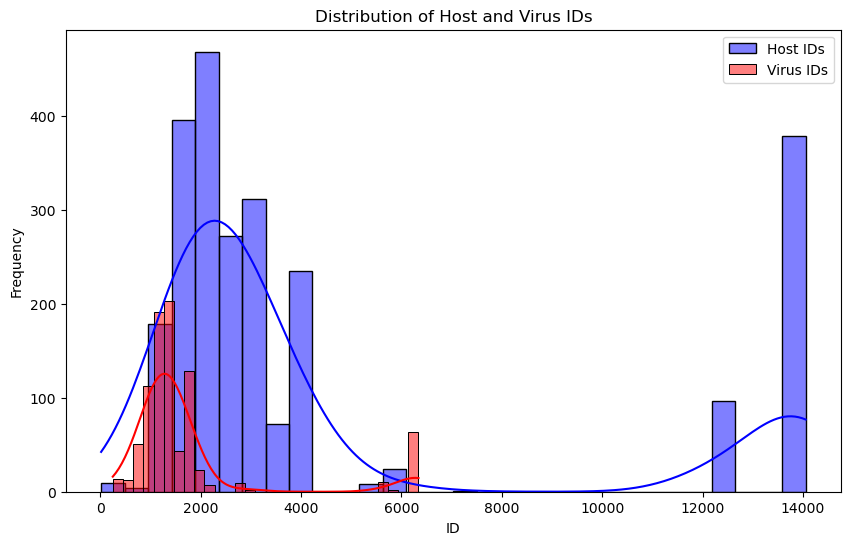

In [68]:
# visualization of the IDs of VHRdb_host["id"] and VHRdb_virus["id"]
plt.figure(figsize=(10, 6))
sns.histplot(VHRdb_host["id"], bins=30, kde=True, color='blue', label='Host IDs')
sns.histplot(VHRdb_virus["id"], bins=30, kde=True, color='red', label='Virus IDs')
plt.title('Distribution of Host and Virus IDs')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [69]:
# common IDs between VHRdb_host and VHRdb_virus
common_ids = set(VHRdb_host["id"]).intersection(set(VHRdb_virus["id"]))
print(f"Number of common IDs: {len(common_ids)}")
print(f"Common IDs: {common_ids}")

Number of common IDs: 363
Common IDs: {2099, 2116, 2117, 2118, 2119, 2120, 2121, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 913, 919, 920, 974, 975, 976, 977, 978, 979, 980, 981, 1210, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 

# Try to get ID from Gaborieau isolates identifiers

Hosts might have an NCBI identifier but most don't. It seems that some of the records are stored in the NCBI databases and using the "name" of the host matches the isolate id. However, manually verifying if the records matche the names is not possible. 




In [70]:
from xml.etree import ElementTree

# Replace with your email — required by NCBI
Entrez.email = "your.email@example.com"

def search_ncbi_by_isolate(isolate_id, db="nucleotide", retmax=2000, verbose=True):
    """
    Search NCBI using an isolate identifier and return matching record IDs.

    Parameters:
        isolate_id (str): The isolate identifier to search for.
        db (str): NCBI database to search (default: "nucleotide").
        retmax (int): Maximum number of records to return.
        verbose (bool): Whether to print intermediate information.

    Returns:
        List[str]: List of NCBI IDs (e.g., GenBank accession numbers).
    """

    # Format the search term — using [isolate] tag can help refine
    search_term = f'"{isolate_id}"[Isolate]'

    if verbose:
        print(f"Searching NCBI '{db}' database for: {search_term}")

    # Run the Entrez esearch
    handle = Entrez.esearch(db=db, term=search_term, retmax=retmax)
    results = Entrez.read(handle)
    handle.close()

    ids = results.get("IdList", [])

    if verbose:
        print(f"Found {len(ids)} record(s).")

    return ids

def fetch_summary(ids, db="nucleotide", verbose=True):
    """
    Fetch summaries (titles, accession numbers, etc.) for given NCBI IDs.

    Parameters:
        ids (List[str]): List of NCBI IDs to fetch.
        db (str): Database to fetch from.

    Returns:
        List[dict]: Summary information for each ID.
    """
    if not ids:
        return []

    handle = Entrez.esummary(db=db, id=",".join(ids))
    records = Entrez.read(handle)
    handle.close()

    if verbose:
        for record in records:
            print(f"{record['Caption']} | {record['Title']}")

    return records

# Example usage
if __name__ == "__main__":
    isolate_identifier = "001-031-c1"  # <-- Replace with your isolate ID
    ids = search_ncbi_by_isolate(isolate_identifier, verbose=False)
    print(f"Found IDs: {ids}")
    summaries = fetch_summary(ids)

Found IDs: ['2094213945', '2094213944', '2094213943', '2094213942', '2094213941', '2094213940', '2094213939', '2094213938', '2094213937', '2094213936', '2094213935', '2094213934', '2094213933', '2094213932', '2094213931', '2094213930', '2094213929', '2094213928', '2094213927', '2094213926', '2094213925', '2094213924', '2094213923', '2094213922', '2094213921', '2094213920', '2094213919', '2094213918', '2094213917', '2094213916', '2094213915', '2094213914', '2094213913', '2094213912', '2094213911', '2094213910', '2094213909', '2094213908', '2094213907', '2094213906', '2094213905', '2094213904', '2094213903', '2094213902', '2094213901', '2094213900', '2094213899', '2094213898', '2094213897', '2094213896', '2094213895', '2094213894', '2094213893', '2094213892', '2094213891', '2094213890', '2094213889', '2094213888', '2094213887', '2094213886', '2094213885', '2094213884', '2094213883', '2094213882', '2094213881', '2094213880', '2094213879', '2094213878', '2094213877', '2094213876', '2094213

In [71]:
# NOT USEFUL ALERT - Normally, all the public data where sequences are available have an NCBI Identifier. 
# create dict to store isolate and their list of IDs
isolate_ids_dict = {}

for name in VHRdb_host["name"]:
    isolate_identifier = name  # Use the current name as the isolate ID
    #ids = search_ncbi_by_isolate(isolate_identifier, retmax=30, verbose=False)
    #if len(ids) > 0:
    #    print(f"Found IDs: {ids}")
    #    isolate_ids_dict[isolate_identifier] = ids


#print(f"Total isolates found: {len(isolate_ids_dict)}")

Found IDs: ['2094180364', '2094180361', '2094180360', '2094180359', '2094180358', '2094180357', '2094180356', '2094180355', '2094180354', '2094180353', '2094180352', '2094180351', '2094180350', '2094180349', '2094180348', '2094180347', '2094180346', '2094180345', '2094180344', '2094180343', '2094180342', '2094180341', '2094180340', '2094180339', '2094180338', '2094180337', '2094180336', '2094180335', '2094180334', '2094180333']
Found IDs: ['2094213945', '2094213944', '2094213943', '2094213942', '2094213941', '2094213940', '2094213939', '2094213938', '2094213937', '2094213936', '2094213935', '2094213934', '2094213933', '2094213932', '2094213931', '2094213930', '2094213929', '2094213928', '2094213927', '2094213926', '2094213925', '2094213924', '2094213923', '2094213922', '2094213921', '2094213920', '2094213919', '2094213918', '2094213917', '2094213916']
Found IDs: ['2094186612', '2094186611', '2094186610', '2094186609', '2094186608', '2094186607', '2094186606', '2094186605', '2094186604'

KeyboardInterrupt: 

In [ ]:
VHRdb_virus["is_ncbi_identifier_value"].value_counts()

is_ncbi_identifier_value
False    556
True     316
Name: count, dtype: int64